# Bias of Pathogenicity Scores Towards Specific Amino Acids and SASA

### Important: SASA - paper identified that pathogenicity scores are higher in buried aminoacids than in surface accessible a.a.

In [ ]:
# Compute the average pathogenicity scores in both models for each amino acid type
     # 1. for N-out Proteome
     # 2. for Multispan proteome
     # 3. for Human proteome
     # 2.1,2,3 for their differences - In what amino acid types do the models differ?

# Look at hydrophobic amino acids 
     # N-out Proteome
     # Multispan proteome
     # Human proteome

# plot a 20x20 Heatmap with average rank scores per mutation, and then average score per amino acid reference type

In [2]:
# --- Project Setup ---
from setup_notebook import setup_project_root
setup_project_root()

from src.project_config import get_paths, get_paths_protein, get_aa_list
from src.bias. compute_variant_bias import compute_variant_bias
import pandas as pd
import os
from tqdm.notebook import tqdm
import numpy as np
from os import mkdir
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
compute_variant_bias("N_out_proteome")      # 8 Min
compute_variant_bias("Multispan_proteome")  # 15 min
compute_variant_bias("human_proteome")      # 75 min

In [3]:
# Load the matrices
matrix_am = pd.read_csv(get_paths()["processed"] / "5.6.Bias" / "am_20x20_matrix_N_out_proteome.csv", index_col=0)
matrix_esm = pd.read_csv(get_paths()["processed"] / "5.6.Bias" / "esm_20x20_matrix_N_out_proteome.csv", index_col=0)

# Reorder the indices (example order)
new_order = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
new_order_reversed = new_order[::-1]
matrix_am = matrix_am.reindex(index=new_order_reversed, columns=new_order)
matrix_esm = matrix_esm.reindex(index=new_order_reversed, columns=new_order)

# BEGIN: Compute the difference between matrices and save
difference_matrix = matrix_esm - matrix_am
difference_matrix.to_csv(get_paths()["processed"] / "5.6.Bias" / "difference_matrix_am_nout.csv")

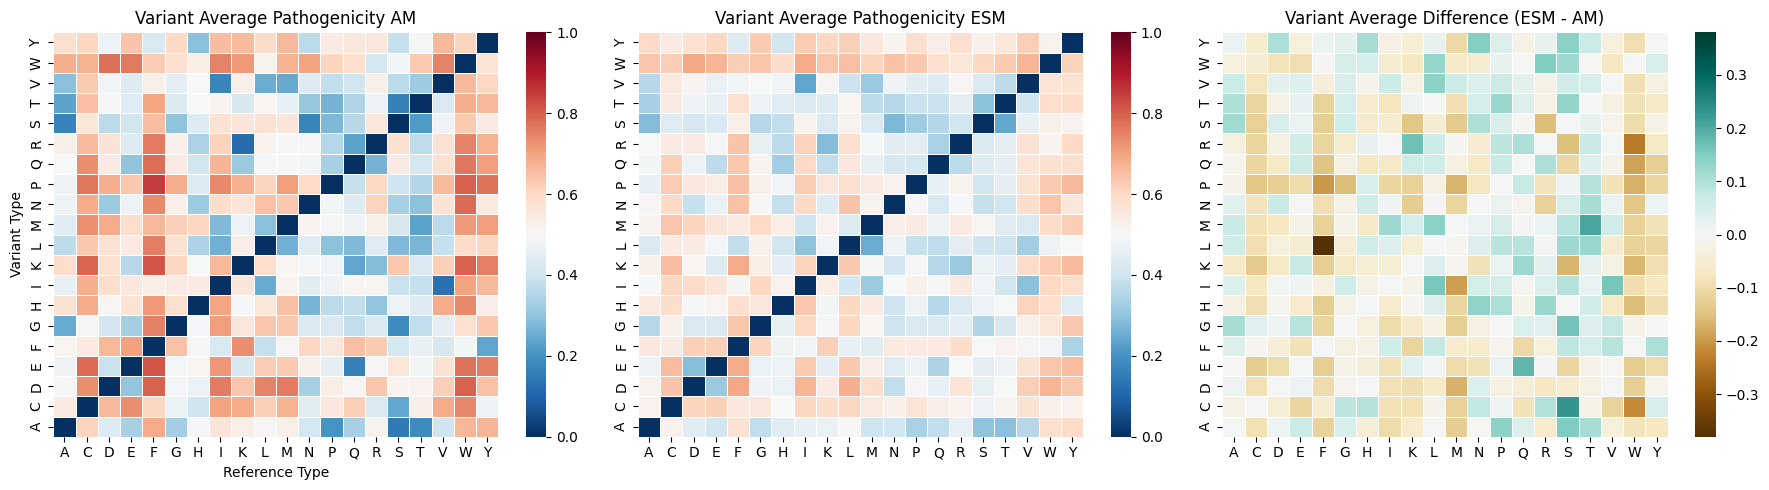

In [4]:
# Load the matrices
matrix_am = pd.read_csv(get_paths()["processed"] / "5.6.Bias" / "am_20x20_matrix.csv", index_col=0)
matrix_esm = pd.read_csv(get_paths()["processed"] / "5.6.Bias" / "esm_20x20_matrix.csv", index_col=0)

# Reorder the indices (example order)
new_order = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
new_order_reversed = new_order[::-1]
matrix_am = matrix_am.reindex(index=new_order_reversed, columns=new_order)
matrix_esm = matrix_esm.reindex(index=new_order_reversed, columns=new_order)

# BEGIN: Compute the difference between matrices and save
difference_matrix = matrix_esm - matrix_am
difference_matrix.to_csv(get_paths()["processed"] / "5.6.Bias" / "difference_matrix_am_nout.csv")
# END: Compute the difference between matrices and save

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Heatmap for matrix_am
sns.heatmap(matrix_am, linewidth=0.5, cmap="RdBu_r", vmax=1, vmin=0.0, ax=axes[0])
axes[0].set_title('Variant Average Pathogenicity AM')
axes[0].set_ylabel('Variant Type')
axes[0].set_xlabel('Reference Type')

# Heatmap for matrix_esm
sns.heatmap(matrix_esm, linewidth=0.5, cmap="RdBu_r", vmax=1, vmin=0, ax=axes[1])
axes[1].set_title('Variant Average Pathogenicity ESM')
axes[0].set_xlabel('Reference Type')

# Heatmap for difference_matrix
sns.heatmap(difference_matrix, linewidth=0.5, cmap="BrBG", vmax=0.38, vmin=-0.38, ax=axes[2])
axes[2].set_title('Variant Average Difference (ESM - AM)')
axes[0].set_xlabel('Reference Type')

plt.tight_layout()
plt.savefig(get_paths()["images_path"] / "5.7.Bias" / "variant_bias_heatmaps_human_proteome.png")
plt.show()
